# **MÔ HÌNH DỰ ĐOÁN CẢM XÚC VĂN BẢN - TIẾNG ANH**

## Cài đặt thư viện


In [ ]:
!pip install pandas==2.2.2
!pip install seaborn==0.13.2
!pip install matplotlib
!pip install nltk==3.8.1
!pip install scikit-learn==1.5.1


## Nhập thư viện
### Các thư viện sử dụng trong mô hình
   1. **pandas**: Phân tích bộ dữ liệu

   2. **seaborn, matplotlib**:  Trực quan hóa dữ liệu

   3. **time**: Tính thời gian huấn luyện của mô hình

   4. **re, nltk**: Tiền xử lý dữ liệu văn bản

   5. **sklearn TfidfVectorizer**: Vector hóa dữ liệu văn bản

   6. **sklearn train_test_split**: Phân chia bộ dữ liệu để huấn luyện và kiểm tra

   7. **sklearn LogisticRegression, MultinomialNB**: Xây dựng mô hình LogisticRegression và Naive Bayes
   
   8. **sklearn accuracy_score, classification_report, confusion_matrix**: Đánh giá hiệu quả mô hình


In [84]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score





## Đọc tệp dữ liệu csv bằng thư viện pandas
Bộ dữ liệu được nhóm lấy trên Kaggle tại [đây](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

In [85]:
english_dataset = "IMDB_Dataset.csv"
data = pd.read_csv(english_dataset)


## Xem qua về bộ dữ liệu
Tổng quan, bộ dữ liệu gồm các văn bản đánh giá phim và được đánh nhãn về cảm xúc tương ứng.

In [86]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## Phân tích bộ dữ liệu
 Bộ dữ liệu gồm **50.000 samples** là các văn bản đánh giá.

In [87]:
data.shape

(50000, 2)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Gồm **2** cột là các đánh giá và cảm xúc tương ứng.

In [89]:
data.columns

Index(['review', 'sentiment'], dtype='object')

 Bộ dữ liệu **không có** sample nào bị đánh nhãn thiếu.

In [90]:
missing_values=data.isnull().sum() # missing values

percent_missing = data.isnull().sum()/data.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
review,0,0.0
sentiment,0,0.0


Dữ liệu **cân bằng** với số lượng đánh giá **tích cực** và **tiêu cực** đều bằng **25.000**

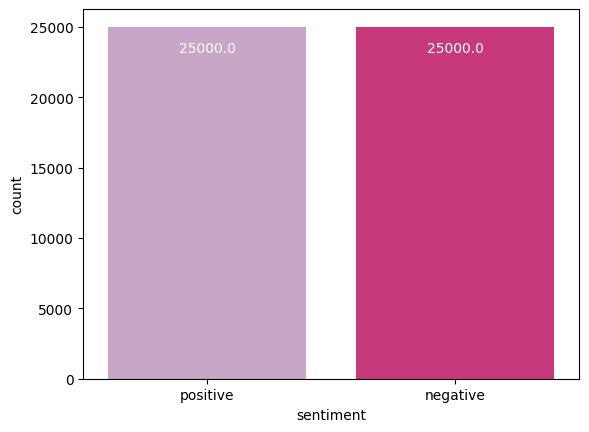

In [91]:
ax = sns.countplot(x='sentiment',data=data, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

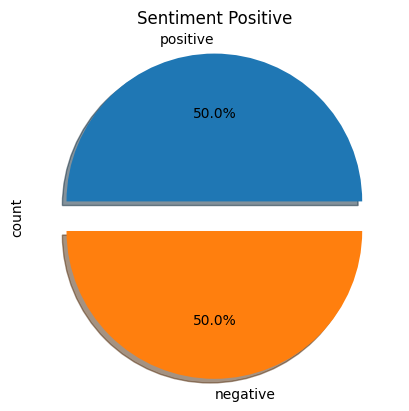

In [92]:
data["sentiment"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Sentiment Positive');

## Phân chia bộ dữ liệu
Bộ dữ liệu được chia thành **2** phần: **Huấn luyện (train)** và **Kiểm thử (test)** với tỷ lệ **80%:20%**

In [93]:
x_train, x_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=99)

## Tiền xử lý dữ liệu
### Các bước xử lý
   1. Tải thư viện **wordnet** dùng để xử lý các dữ liệu văn bản **tiếng Anh**

   2. Chuyển ký tự viết **hoa** về viết **thường**

   3. Xóa các **dấu câu**, **ký tự đặc biệt**

   4. Xóa các **stop word** (từ nối, liên từ,...)

   5. Chuyển các từ về **cơ bản** **(Lemmatization)**. Ví dụ: ran, running -> run

   6. Áp dụng **hàm tiền xử lý** vào tập **train** và **test**


In [ ]:
nltk.download('wordnet')
def pre_process(text):
    #lower text
    text = text.lower()
    #remove special char
    text = re.sub(r'[^\w\s]', '', text)
    #remove stop word
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)
    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(lemmatized_words)
    return text

# Apply cleaning function to the text data
x_train = x_train.apply(pre_process)
x_test = x_test.apply(pre_process)

## Vector hóa dữ liệu

 Sử dụng phương pháp **TF-IDF Vectorization** để chuyển các dữ liệu dạng **văn bản** về dạng **vector**

In [95]:
vectorizer = TfidfVectorizer(max_features=54000)

x_train_tfidf = vectorizer.fit_transform(x_train)

x_test_tfidf = vectorizer.transform(x_test)


## Xây dựng hàm đánh giá hiệu quả mô hình
Khởi tạo các biến **từ điển (dictionary)** để lưu giá trị **độ chính xác** và **thời gian** huấn luyện mô hình

In [96]:
accuracies = {}
algo_time={}

### Các chức năng của hàm 
   1. In ra chỉ số **Accuracy**

   2. In ra các chỉ số **Recall, Precision, F1-Score**

   3. In ra **ConFusion Matrix**

In [97]:
def print_performance(yt,clf,clf_name):
    y_pred=clf.predict(x_test_tfidf)
    accuracies[clf_name]=accuracy_score(y_test, y_pred)*100
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))

    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

## Mô hình **Logistic Regression**

Nhắc lại một chút kiến thức về mô hình **Logistic Regression (LR)** đã học trong khóa **AI Adventure**, mô hình **LR** nhận đầu vào là các biến vector $x = [x_1, x_2,...,x_n]$ với đầu ra thường là biến nhị phân là **0** hoặc **1** (Tuy nhiên bằng việc kết hợp các mô hình LR nhị phân thì đầu ra có thể nhận nhiều hơn 2 giá trị). Cụ thể, từ việc huấn luận, mô hình sẽ cho ra hàm tuyến tính:
$$
     z = w^{T}x = w_0+w_{1}x_{1}+w_{2}x_{2}+...+w_{n}x_{n}
$$
Ở đây, vector $w$ là vector chứa các trọng số thu được từ việc huấn luyện. Khi sử dụng mô hình, đầu vào của người dùng được chuyển thành vector **n** chiều là $x$ và được đưa vào hàm **sigmoid**
$$
    \sigma(z) = \frac{1}{1+e^{-z}}=\frac{1}{1+e^{-w^{T}x}}
$$
Đặc điểm của hàm **sigmoid** là nó bị chặn trong khoảng $(0,1)$ và $ \lim_{x \to -\infty} \sigma(x) =0$ và $ \lim_{x \to +\infty} \sigma(x) =1$, hơn nữa đạo hàm của hàm này đơn giản nên được sử dụng rộng rãi. Tùy vào từng loại bài toán mà giá trị của hàm **sigmoid** vượt ngưỡng (thường là 0.5) sẽ đầu ra là 1 và bằng 0 nếu ngược lại.

Trong mã nguồn của dự án, ta sẽ chỉ cần gọi thư viện **scikit-learn** và cho tập huấn luyện đã xử lý vào hàm **LogisticRegression()** là sẽ thu được mô hình.

LOGISTIC REGRESSION

Accuracy Score : 90.25999999999999 %

Classification Report :  
               precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4969
    positive       0.89      0.92      0.90      5031

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



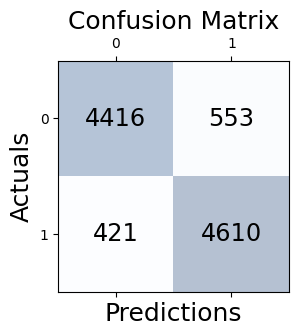

In [98]:
print("LOGISTIC REGRESSION")
start = time.time()
model_LR = LogisticRegression()
model_LR.fit(x_train_tfidf, y_train)
end = time.time()
print_performance(y_test,model_LR,'LOGISTIC REGRESSION')
algo_time['LOGISTIC REGRESSION']=end-start

## Mô hình **Naive Bayes**
Đây là mô hình dựa trên **định lý Bayes** với giả định **ngây thơ (naive)** rằng các đặc trưng là **độc lập** với nhau trong mỗi lớp, vì trong hầu hết bài toán thì chúng luôn có liên quan đến nhau. Đầu vào của mô hình là vector **n** chiều $x$, mô hình sẽ phân loại $x$ vào một trong $C$ nhãn cho trước, bằng cách tính xác suất $x$ rơi vào nhãn nào là lớn nhất. Tức là $x$ được gán nhãn $c$ nếu:
$$
     \displaystyle c = \underset{c \in \{1, \ldots, C\}}{\arg\max} \; p(c \mid x) 
$$
\indent Theo **định lý Bayes** và việc $p(x)$ **không** phụ thuộc vào $c$ ta viết lại thành:
$$
     \displaystyle c = \underset{c}{\arg\max} \; p(c \mid x) = \underset{c}{\arg\max} \; \frac{p(x \mid c)p(c)}{p(x)} = \underset{c}{\arg\max} \; {p(x \mid c)p(c)}
$$
\indent Giá trị của $p(c)$ được tính bằng tỷ lệ của dữ liệu nhãn $c$ trong toàn bộ tập huấn luyện, còn $p(x \mid c$ theo giả định **naive** của ta thì cho bởi:
$$
     p(x|c) = p(x_{1},...,x_{n}|c)= \displaystyle \prod_{i=1}^n p(x_i|c)
$$
Cả hai giá trị này được xác định khi huấn luyện. Trên đây là những ý cơ bản của **Naive Bayes**, tuy giả định **naive** có phần ngây ngô nhưng lại mang đến kết quả khá khả quan trong nhiều bài toán học máy. Trong dự án này, ta cũng chỉ cần gọi hàm **MultinomialNB()** vào tập huấn luyện là hoàn thiện mô hình này.

NAIVE BAYES

Accuracy Score : 87.72999999999999 %

Classification Report :  
               precision    recall  f1-score   support

    negative       0.87      0.89      0.88      4969
    positive       0.89      0.87      0.88      5031

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



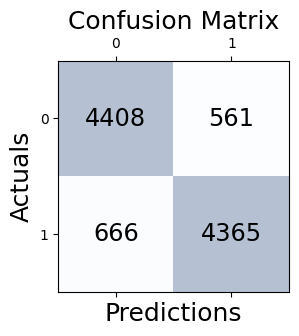

In [99]:
print("NAIVE BAYES")
start = time.time()
model_NB =  MultinomialNB()
model_NB.fit(x_train_tfidf, y_train)
end = time.time()
print_performance(y_test,model_NB,"NAIVE BAYES")
algo_time["NAIVE BAYES"]=end-start

## So sánh kết quả của 2 mô hình **Logistic Regresstion** và **Naive Bayes**

Để ý rằng hiệu quả của mỗi mô hình sẽ được tính bằng chỉ số **accuracy**, tức là tỷ số các **dự đoán đúng** trên **tổng số dự đoán**, do vai trò của mỗi nhãn tiêu cực, tích cực hay trung lập là như nhau.

Ta thấy rằng mô hình **Logistic Regression** thể hiện hiệu quả tốt với tỷ lệ dự đoán đúng là **90.26%** và hơn **2.53%** so với **Naive Bayes** mặc dù thời gian thực hiện lâu hơn nhưng **không** đáng kể với một bài toán học máy đơn giản.

In [100]:
import plotly.express as px
fig = px.bar(x=list(accuracies.keys()), y=list(accuracies.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Accuracy Comparision", xaxis_title="Model", yaxis_title="Accuracy")
fig.show()

In [101]:
fig = px.bar(x=list(algo_time.keys()), y=list(algo_time.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Algorithm Time Comparision", xaxis_title="Model", yaxis_title="")
fig.show()

## Kiểm thử mô hình với các đánh giá mới

### Hàm lấy đánh giá và dự đoán

In [102]:
def predict_rating(review):
    review_tfidf = vectorizer.transform([review])
    predicted_rating = model_LR.predict(review_tfidf)
    return predicted_rating

### Nhập đánh giá mới

In [103]:
new_review = input("Enter your review: ")
predicted_rating = predict_rating(new_review)
print("Predicted rating:", predicted_rating)

Predicted rating: ['negative']
